# Medical Insurance Cost Project

In [53]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso, Ridge

In [3]:
url = 'https://breathecode.herokuapp.com/asset/internal-link?id=416&path=medical_insurance_cost.csv'
df_raw = pd.read_csv(url)
df_raw.sample(10)

,age,sex,bmi,children,smoker,region,charges
753,58,female,22.770,0,no,southeast,11833.78230
771,53,female,26.700,2,no,southwest,11150.78000
1087,57,male,31.540,0,no,northwest,11353.22760
1169,37,female,34.105,1,no,northwest,6112.35295
447,56,female,25.650,0,no,northwest,11454.02150
1067,39,male,42.655,0,no,northeast,5757.41345
1137,26,female,22.230,0,no,northwest,3176.28770
1038,22,male,28.880,0,no,northeast,2250.83520
205,28,female,28.880,1,no,northeast,4337.73520
201,48,female,32.230,1,no,southeast,8871.15170


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df_baking = df_raw.copy()

In [6]:
cat_cols = ['sex', 'smoker', 'region']

df_baking[cat_cols] = df_baking[cat_cols].astype('category')

In [7]:
df = df_baking.copy()

## Numerical analysis

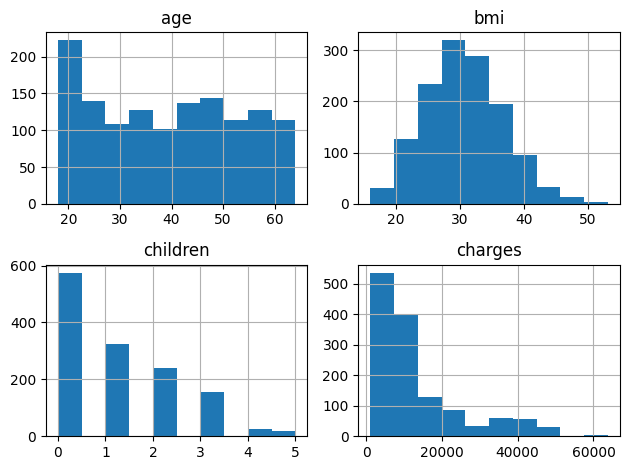

In [8]:
df.hist()
plt.tight_layout()
plt.show()

In [10]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


- People around 20-23 years old are overrepresented in the data set. The age distribution is relatively flat without taking into account young people's peak.
- The bmi distribution assimilates a normal distribution with a slight positive skewness. 
- Most people in the data set do not have any children. The range in number of children in the data set is from none up to 5. 
- The charges distribution is positively skewed. They range from $1100 up to $63770, with a mean of $9382

## Categorical analysis

In [23]:
display(df['sex'].value_counts())
display(df['region'].value_counts())
display(df['smoker'].value_counts())

sex
male      676
female    662
Name: count, dtype: int64

region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64

smoker
no     1064
yes     274
Name: count, dtype: int64

/tmp/ipykernel_3263/1269112220.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


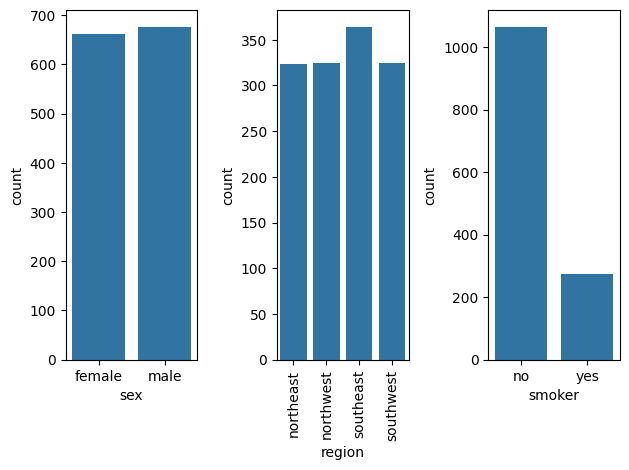

In [19]:
fig, axes = plt.subplots(1, 3)

sns.countplot(df, x='sex', ax=axes[0])
sns.countplot(df, x='region', ax=axes[1])
sns.countplot(df, x='smoker', ax=axes[2])

axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

- The data set has slightly more males than females. 
- Regions are almost equally represented, except for southeast which has slightly more counts than the other regions.
- Non-smokers are overrepresented with 1064 counts, while there are 274 smokers

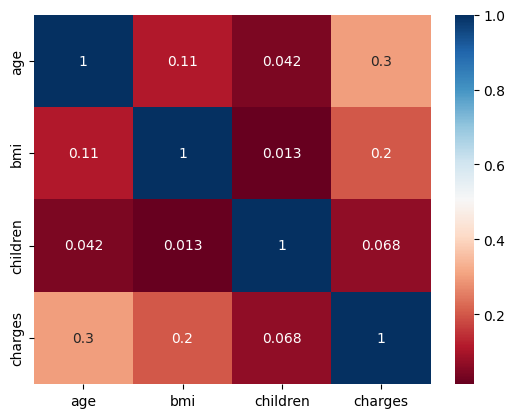

In [55]:
corr = df.select_dtypes(include='number').corr()

sns.heatmap(data=corr, cmap='RdBu', annot=True)
plt.show()

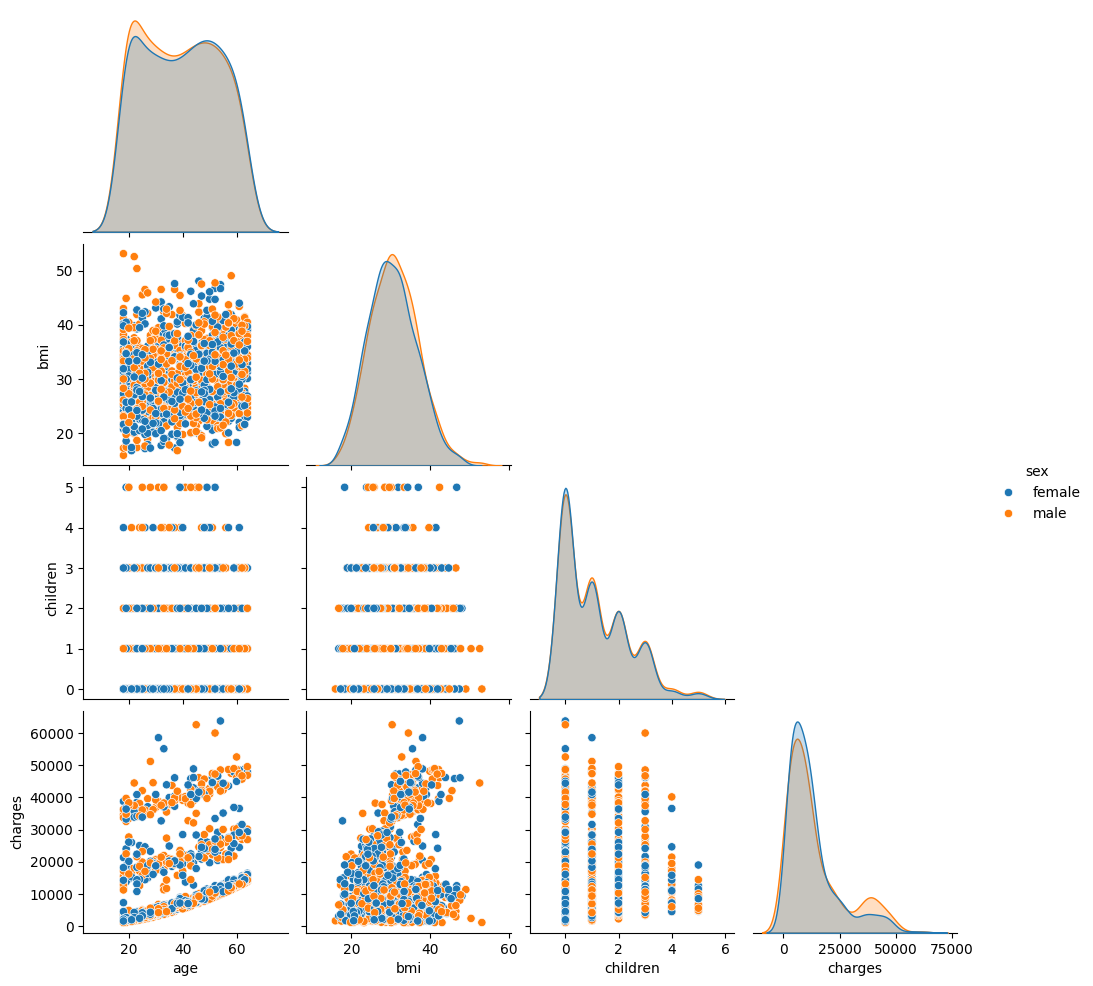

In [24]:
sns.pairplot(df, corner=True, hue='sex')
plt.show()

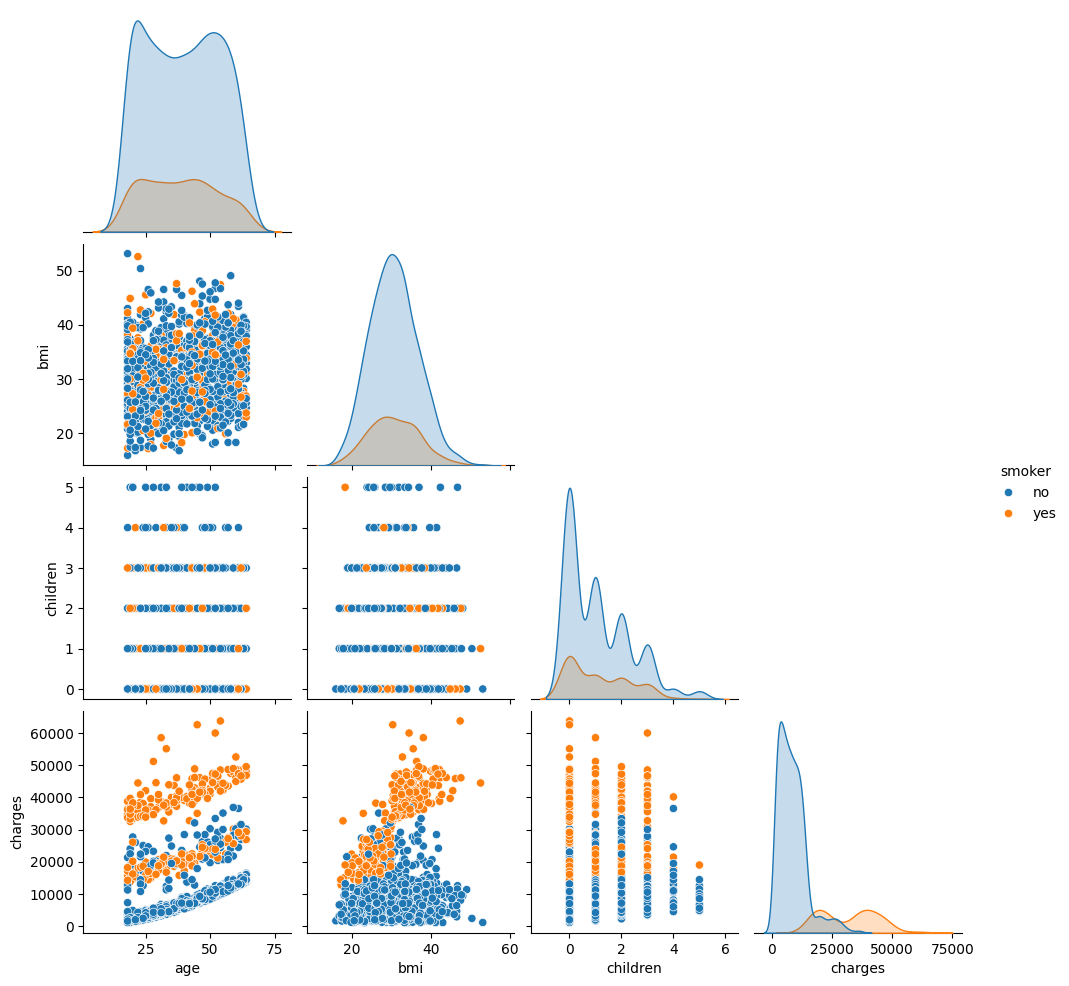

In [25]:
sns.pairplot(df, corner=True, hue='smoker')
plt.show()

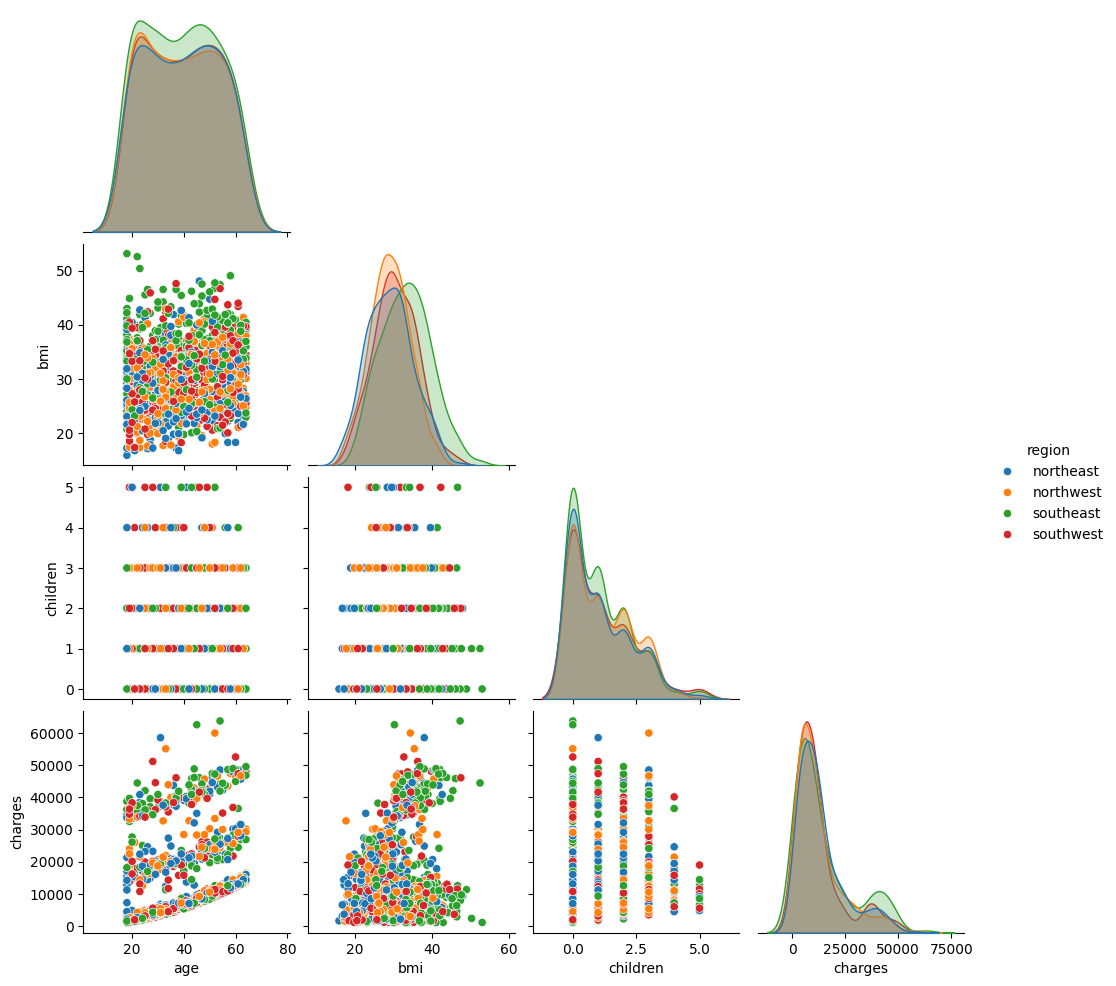

In [26]:
sns.pairplot(df, corner=True, hue='region')
plt.show()

## Linear Regression

In [39]:
# Split data
X = df.drop(columns='charges')
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2025)

In [40]:
num_cols = X_train.select_dtypes('number').columns
cat_cols = X_train.select_dtypes('category').columns

num_proc = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])
cat_proc = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])
processor = ColumnTransformer(transformers=[
    ('num', num_proc, num_cols),
    ('cat', cat_proc, cat_cols)
])
reg_lr = Pipeline(steps=[
    ('proc', processor),
    ('lr', LinearRegression())
])

In [45]:
reg_lr.fit(X_train, y_train)
y_hat = reg_lr.predict(X_test)

In [54]:
display(f'MSE (Mean Squared Error): {mean_squared_error(y_test, y_hat)}')
display(f'MAE (Mean Absolute Error): {mean_absolute_error(y_test, y_hat)}')
display(f'MAE (Root mean Absolute Error): {np.sqrt(mean_squared_error(y_test, y_hat))}')
display(f"Coefficient of determination: {r2_score(y_test, y_hat)}")

'MSE (Mean Squared Error): 29089708.458287608'

'MAE (Mean Absolute Error): 3812.4905115619786'

'MAE (Root mean Absolute Error): 5393.487596934622'

'Coefficient of determination: 0.7844754389532129'

In [56]:
display(f"Intercept (a): {reg_lr['lr'].intercept_}")
display(f"Coefficients (b): {reg_lr['lr'].coef_}")

'Intercept (a): -2141.8672043122006'

'Coefficients (b): [12017.64086831 12671.90955965  2771.35215433  -198.4432637\n 23859.66480821  -148.39003587  -993.63893866  -705.41940663]'

### Formulas:

$$y=β_0+β_1*age+β_2*bmi+β_3*children+β_4*malesex+β_5*smokeryes+β_6*regionNW+β_7regionSE+β_8*regionSW$$

$$y=-2141+12017.6*age+12671.9*bmi+2771.3*children-198.4*malesex+23859.7*smokeryes-148.4*regionNW-993.7*regionSE-705.4*regionSW$$

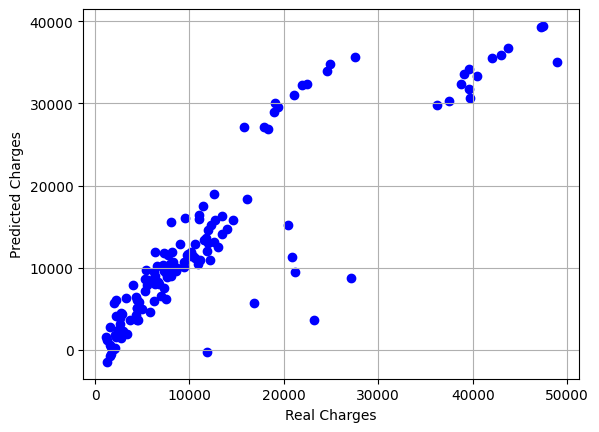

In [51]:
plt.scatter(x=y_test, y=y_hat, color='b')
plt.grid(True)
plt.xlabel('Real Charges')
plt.ylabel('Predicted Charges')
plt.show()

In [57]:
reg_ridge = Pipeline(steps=[
    ('proc',processor),
    ('reg_ridge',Ridge(alpha=100))
])

reg_ridge.fit(X_train, y_train)
y_hat = reg_ridge.predict(X_test)

In [58]:
display(f'MSE(Mean squeare error): {mean_squared_error(y_test, y_hat)}') #Prueba, prediccion
display(f'MAE(Mean absolute error): {mean_absolute_error(y_test, y_hat)}')
display(f'RMSE(Root mean squeare error): {np.sqrt(mean_squared_error(y_test, y_hat))}')
display(f"Coefficient of determination: {r2_score(y_test, y_hat)}")

'MSE(Mean squeare error): 43013749.375183254'

'MAE(Mean absolute error): 4961.818662170923'

'RMSE(Root mean squeare error): 6558.486820538961'

'Coefficient of determination: 0.6813127410212416'

## Conclusions:

The linear regression model correctly explains 78% of the variance, with an average error of $3k to $5k. This suggests a strong fit, but there is still room for improvement. 

The ridge regression model explains about 68% of the variance. This is a moderately strong fit, but has a significant error level of $4k up to $6k. This model struggles to predict exact charges.
